<h1>Questions to be handed in on extrema:</h1>

<p>To get started, we load our <code>MTH229</code> package for plotting and other features:</p>

In [1]:
# load MTH229 package one way or the other
using Pkg
if haskey(Pkg.installed(), "MTH229")
    using MTH229
else
    try
        Pkg.add(PackageSpec(url="https://github.com/mth229/MTH229.jl", rev="master"))
        using MTH229
    catch err
        include(download("https://raw.githubusercontent.com/mth229/MTH229.jl/master/src/229.jl"))
    end
end

<h3>Quick background</h3>

<p>Read about this material here: <a href="http://mth229.github.io/extrema.html">Maximization and minimization with julia</a>.</p>

<p>For the impatient, <em>extrema</em> is nothing more than a fancy word for describing either a maximum <em>or</em> a minimum. In calculus, we have <strong>two</strong> concepts of these: <em>relative</em> extrema and <em>absolute</em> extrema. Let's focus for a second on <em>absolute</em> extrema which are stated as:</p>

<blockquote>
<p>A value $y=f(x)$ is an <em>absolute maximum</em> over an interval $[a,b]$ if $y \geq f(x)$ for all $x$ in $[a,b]$. (An absolute minimum has $y \leq f(x)$ instead.)</p>
</blockquote>

<p>Of special note is that an absolute extrema involves <em>both</em> a function <strong>and</strong> an interval.</p>

<p>There are two theorems which help identify extrema here. The first, due to Bolzano, says that any continuous function on a <em>closed</em> interval will <em>necessarily</em> have an absolute maximum and minimum on that interval. The second, due to Fermat, tells us where to look: these absolute maximums and minimums can only occur at end points or critical points.</p>

<p>Bolzano and Fermat are historic figures. For us, we can plot a function to visually see extrema. The value of Bolzano is the knowledge that yes, plotting isn't a waste of time, as we are <em>guaranteed</em> to see what we look for. The value of Fermat is that if we want to get <em>precise</em> numeric answers, we have a means: identify the end points and the critical points then compare  the function at <em>just</em> these values.</p>

<hr />

<p>The notes walk us through the task of finding among all rectangles with perimeter 20 the one with maximum area.</p>

<p>This leads to two equations:</p>

<ul>
<li><p>a constraint based on a fixed perimeter: $20 = 2b + 2h$.</p>
</li>
<li><p>an expression for the area: $A=h \cdot b$.</p>
</li>
</ul>

<p>We translate these into <code>Julia</code> functions. First, using the constraint, we solve for one variable and then substitute this in:</p>

In [1]:
h(b) = (20 - 2b) / 2
A(b) = h(b) * b    # A = h * b translates to this

A (generic function with 1 method)

<p>So we have area as a function of a single variable. Here <code>b</code> ranges from $0$ to no more than 10, as both <code>b</code> and <code>h</code> need be non-negative. A plot shows the function to maximize:</p>

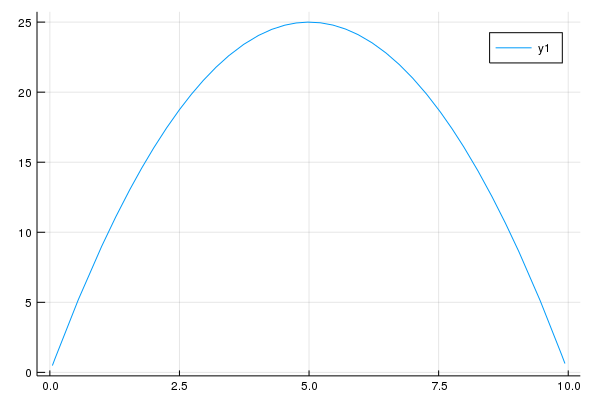

In [1]:
plot(A, 0, 10)

<p>Not only do we see a maximum value, we also can tell more:</p>

<ul>
<li><p>the maximum happens at a critical point - not an end point</p>
</li>
<li><p>there is a unique critical point on this interval $[0,10]$.</p>
</li>
</ul>

<p>So, we can use <code>fzero</code> to find the critical point:</p>

In [1]:
x = fzero(A', 5)

5.0

<p>We store the value as <code>x</code>. Is this the answer? Not quite, the question asks for the rectangle that gives the maximum area, so we should also find the height. But this is just</p>

In [1]:
h(x)

5.0

<p>In fact, for the problems encountered below, the critical point, the constraint at the critical point, or the function evaluated at the critical point are used to answer the questions:</p>

In [1]:
x, h(x), A(x)

(5.0, 5.0, 25.0)

<h3>Questions</h3>

<p>For the following questions (which were cribbed from various internet sources) find the most precise answer available, a graphical solution is not enough, the answers should use one of the zero-finding methods.</p>

<ul>
<li><p><em>Ye olde post office</em></p>
</li>
</ul>

<p>A box with a square base is taller than it is wide. In order to send the box through the U.S. mail, the height of the box and the perimeter of the base can sum to no more than 108 inches. Show how to compute the maximum volume for such a box.</p>

<p>Which of these equations expresses the volume of the square box, with lengths $a$, $a$, and $b$?</p>

&#10054; $V = a^3$
&#10054; $V = a^2 \cdot b$
&#10054; $V = a \cdot b$
&#10054; $V = a \cdot b^2$



<p>Which of these equations describes the <em>constraint</em> between $a$ and $b$?</p>

&#10054; $108 = 8a + 4b$
&#10054; $108 = a \cdot a \cdot b$
&#10054; $108 = 4a + b$
&#10054; $108 = a + b$



<p>Write a function expressing the volume as a function of $a$ by combining your last two questions. What range of values is possible for $a$?</p>

&#10054; $[0, 108]$
&#10054; $[0, \infty)$
&#10054; $[-10, 10]$
&#10054; $[0, 108/4]$



<p>Using <code>Julia</code> find a a numeric value for the <em>maximum</em> volume of a box under this scenario?</p>

<ul>
<li><p><em>Inscription</em></p>
</li>
</ul>

<p>A trapezoid is inscribed in a semicircle of radius $r=2$ so that one side is along the diameter. Find the maximum possible area for the trapezoid.</p>

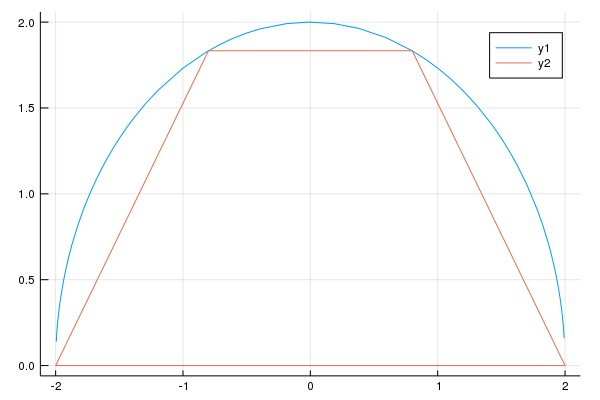

<p>The area of trapezoid is the height times the average of the two bases or with this picture: $(2r + 2x) / 2 \cdot y$.</p>

<p>What equation describes the constraint between $x$ and $y$?</p>

&#10054; $x^2 + y^2 = r/2$
&#10054; $x^2 + y^2 = r^2$
&#10054; $x^2 + y^2 = r$
&#10054; $y - x^2 = r^2$



<p>If area is expressed as a function of $x$, what is the range of possible values, assuming $x \geq 0$ and $r=2$?</p>

&#10054; $[0, r/2]$
&#10054; $[0, r]$
&#10054; $[0, r^2]$
&#10054; $[0, \infty)$



<p>What is the maximum area of an inscribed trapezoid when $r=2$, as described above?</p>

<ul>
<li><p><em>Cheap paper cups</em></p>
</li>
</ul>

<p>A cone-shaped paper drinking cup is to hold 100 cubic centimeters of water (about 4 ozs). Find the height and radius of the cup that will require the least amount of paper.</p>

<p>The volume of such a cup is given by the volume of a cone formula: $V = (1/3)\pi r^2 h$; and the area of the paper is given by for formula for surface area of a cone: $A=\pi r \sqrt{r^2 + h^2}$.</p>

<p>What <code>Julia</code> function relates $h$ and $r$ through the constraint on the volume?</p>

&#10054; `h(r) = 100 * (1/3) * pi * r^2`
&#10054; `h(r) = (1/3) * pi * r^2`
&#10054; `h(r) = 100/(1/3 * pi * r^2)`



<p>What <code>Julia</code> function would correctly represent <code>A&#40;r&#41;</code>?</p>

&#10054; `A(r) = pi * r * sqrt(r^2 + h^2)`
&#10054; `A(r) = pi * r * sqrt(r^2 + h(r)^2)`
&#10054; `A(r) = pi * r * sqrt(r^2 )`



<p>Based on your answers above, what value of <code>r</code> minimizes <code>A&#40;r&#41;</code></p>

<p>What is the value of <code>h</code> for this value of <code>r</code>?</p>

<ul>
<li><p><em>How big is that can?</em></p>
</li>
</ul>

<p>A cylindrical can, <strong>open on top</strong>, is to hold 355 cubic centimeters of liquid. Find the height and radius that minimizes the amount of material needed to manufacture the can. (These are metric units, so the answer will be in centimeters with 2.54cm=1in.)  Illustrate how this is done:</p>

<p>Do these proportions match those that are typical for a 12 oz can?</p>

&#10054; Yes, the height is about 2 times the diameter
&#10054; No, the can has a square profile
&#10054; No, the diameter is twice the height



<ul>
<li><p><em>Getting closer</em></p>
</li>
</ul>

<p>Let $f(x) = \tan(x)$. Find the point on the graph of $f(x)$ that is closest to the point $(\pi/4, 0)$. Show any work.</p>

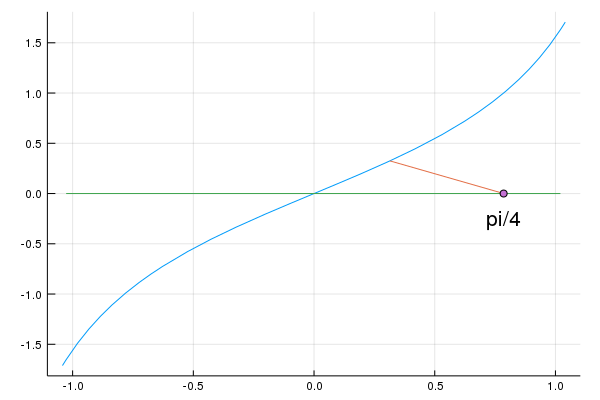

<p>Recall the distance formula: $d= \sqrt{(x_1 - x_0)^2 + (y_1 - y_0)^2}$, as we need to minimize this.</p>

<ul>
<li><p><em>Best size for a phone</em></p>
</li>
</ul>

<p>A cell phone manufacturer wishes to make a rectangular phone with total surface area of 12,000 $mm^2$ and maximal screen area. The screen is surrounded by bezels with sizes of 4$mm$ on the long sides and 16$mm$ on the short sides. (So the width of the screen would be the width of the phone minus 8mm, and the height of the screen minus 32 $mm$.)</p>

<p>What are the dimensions (width and height) that allow the maximum screen area?</p>

<p>The dimensions for the most phones have a height that is about twice the   width. Is that the case for your answer?</p>

&#10054; No the height to width ratio is closer to 1 to 1
&#10054; Yes, the height to width ratio is basically 2 to 1
&#10054; No, the height to width ratio is closer to 3 to 1
&#10054; No the height to width ratio is closer to 4 to 1



<ul>
<li><p><em>Saving money</em></p>
</li>
</ul>

<p>It is desired to build a pipeline from an at sea oil well to refinery on the shore. The oil well is 2 miles offshore and the refinery is 3 miles along the coastline. Building a pipe costs 500,000 dollars per mile under water and 300,000 dollars per mile under land. (Problem, with figure, borrowed from this <a href="http://www.math.wisc.edu/~frooney/M217_3_Optimization.pdf">example 5</a> ).</p>

<p>What formula will describe the cost, where $x$ is the position along the shore where the pipeline meets ($x=3$ means the pipeline goes directly to the refinery).</p>

&#10054; `c(x) = 500_000 * (2 + x)^2 + 300_000 * (3 - x)^2`
&#10054; `c(x) = 500_000 * sqrt(2^2 + x^2) + 300_000 * sqrt(3-x^2)`
&#10054; `c(x) = 500_000 * sqrt(2^2 + x^2) + 300_000 * (3-x)`



<p>What is the cost of the cheapest possible pipeline?</p>

<ul>
<li><p><em>Will you be in the water?</em></p>
</li>
</ul>

<p>The Statue of Liberty stands 92 meters high, including the pedestal which is 46 meters high. How far from the base is it when the viewing angle, theta, is as large as possible? <a href="http://astro.temple.edu/~dhill001/maxmin/viewanglepic.gif">figure</a></p>

<p>The angle theta is?</p>

<p>Copy your commands to find this value here:</p>